##Importing the Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score,
    recall_score, f1_score, roc_curve, auc, classification_report
)
from sklearn.decomposition import PCA

##Loading the Dataset

In [ ]:
# Loading the dataset
wine = datasets.load_wine()
X, y = wine.data, wine.target
class_names = wine.target_names


##Standardizing Features

In [ ]:
# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##Training model and plotting the graphs

MLP Classifier Experimentation on Original Feature Set


===== MLP Classifier (T-T: 50:50) =====
Accuracy: 0.9775
Precision: 0.9775
Recall: 0.9775
F-score: 0.9775
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.97      0.97      0.97        35
           2       0.96      0.96      0.96        24

    accuracy                           0.98        89
   macro avg       0.98      0.98      0.98        89
weighted avg       0.98      0.98      0.98        89



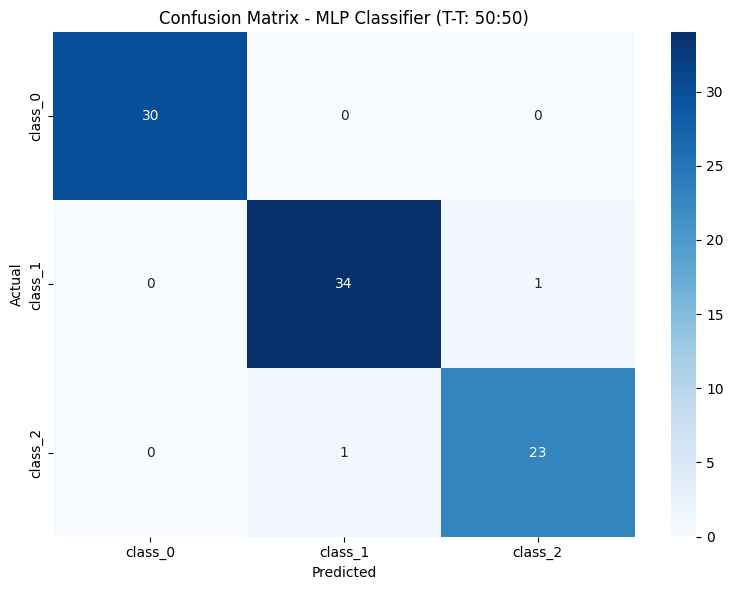

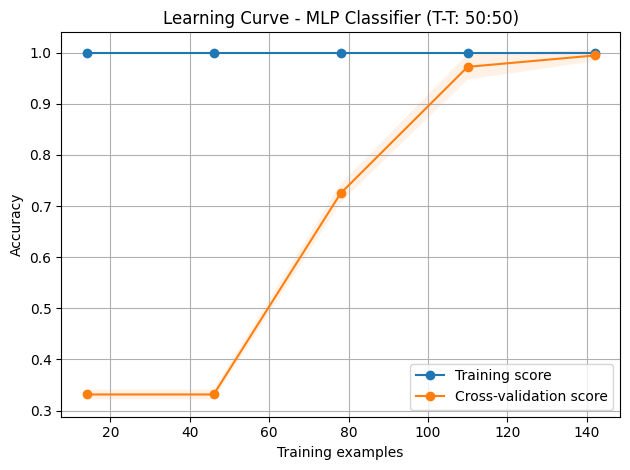

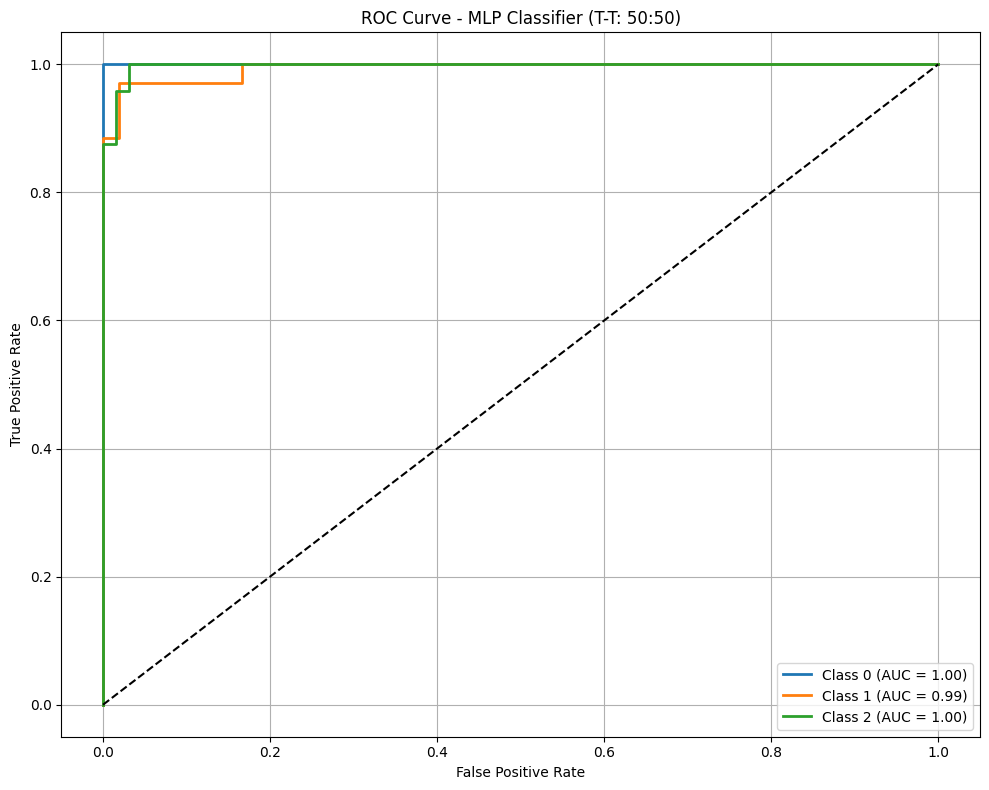


===== MLP Classifier (T-T: 60:40) =====
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F-score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        29
           2       1.00      1.00      1.00        19

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



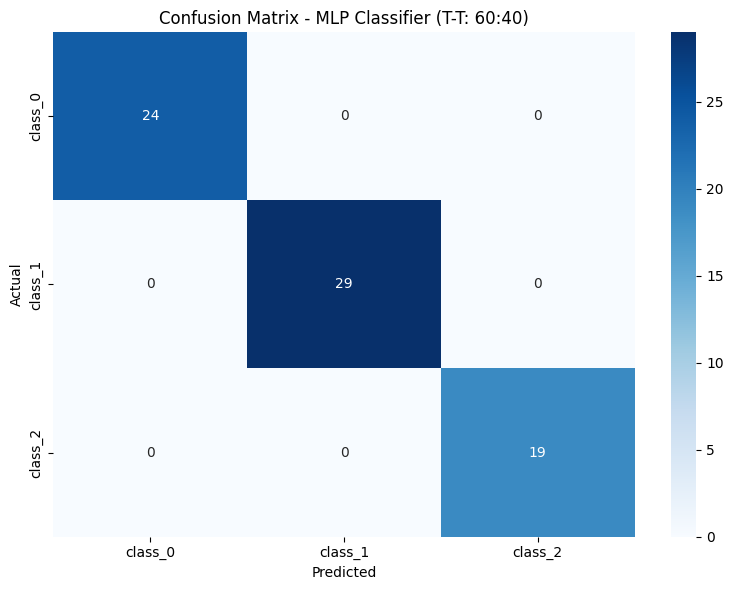

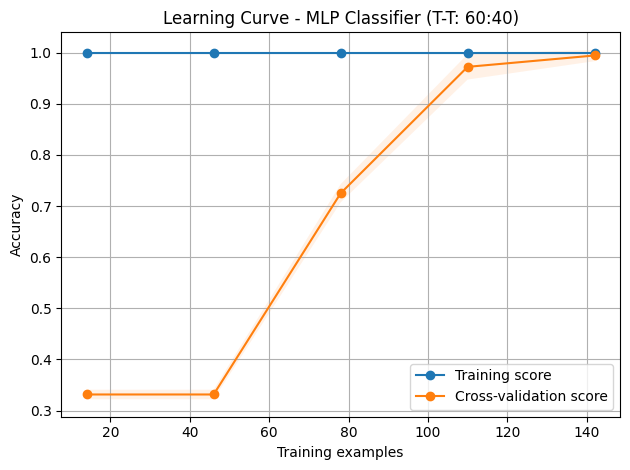

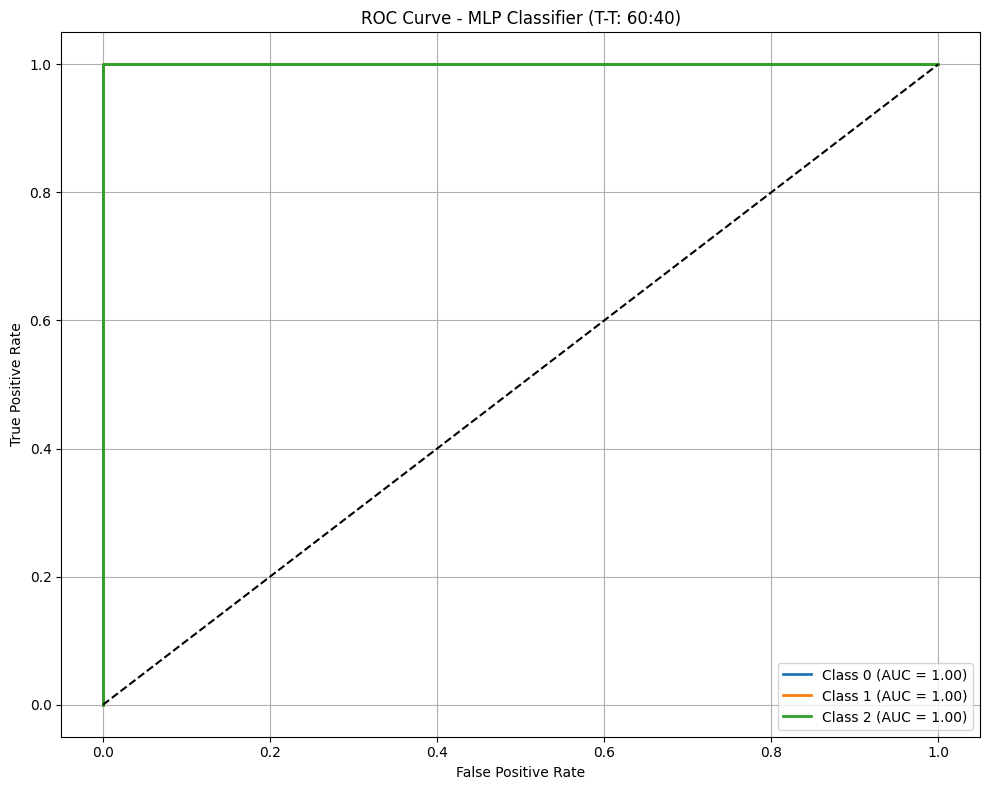


===== MLP Classifier (T-T: 70:30) =====
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F-score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


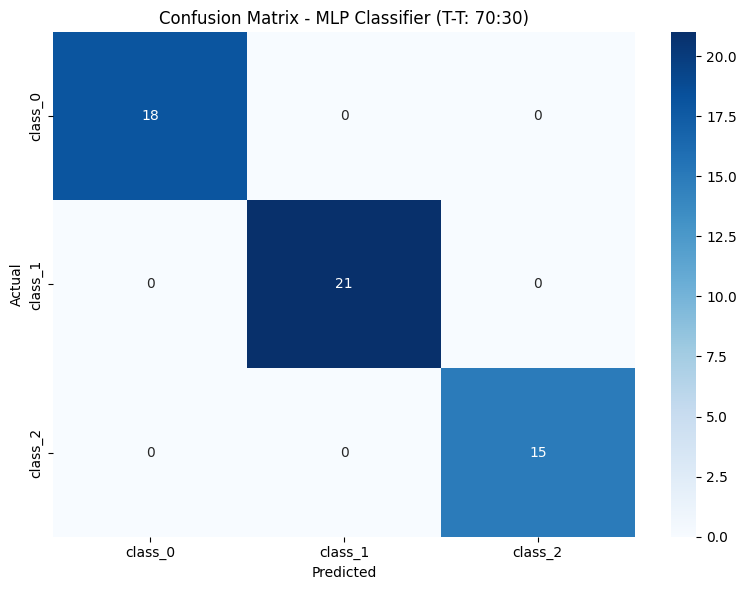

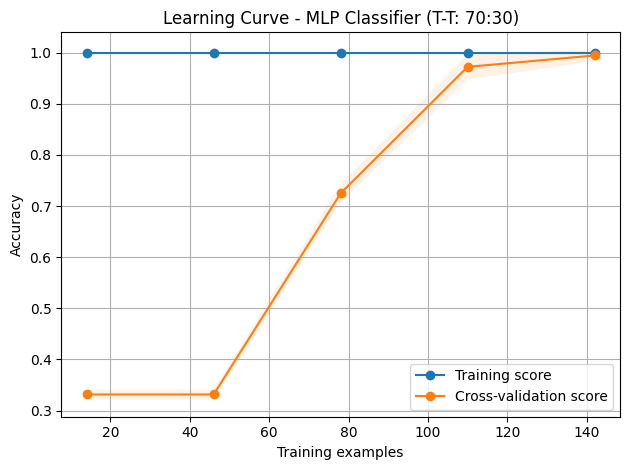

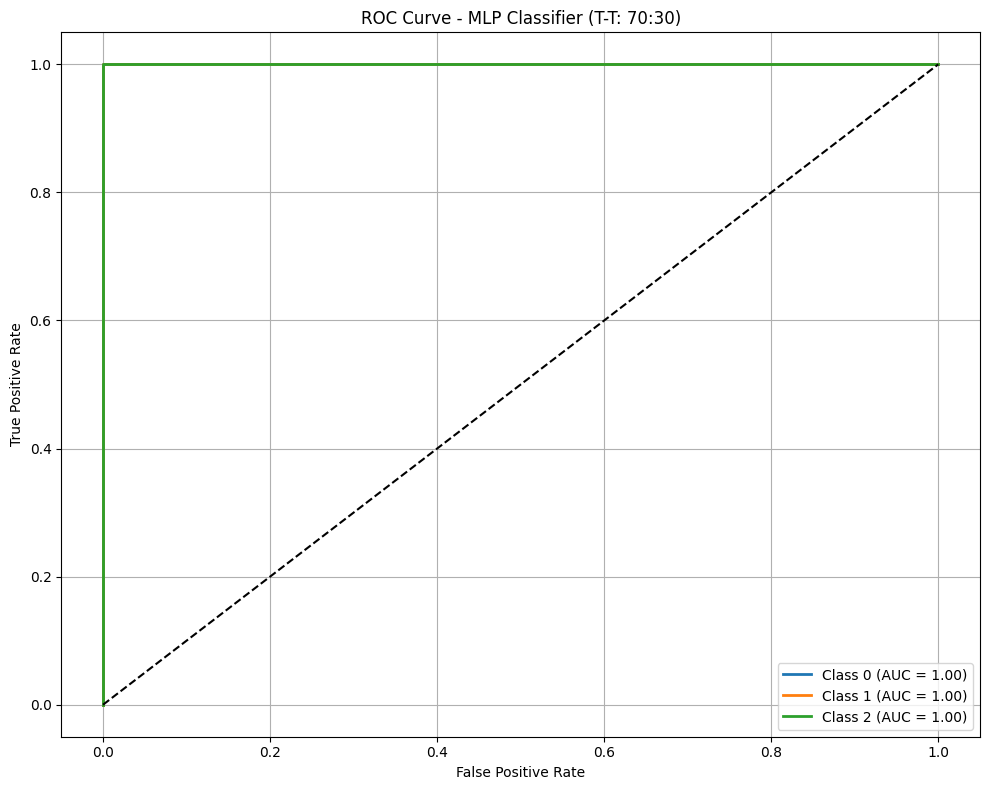


===== MLP Classifier (T-T: 80:19) =====
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F-score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


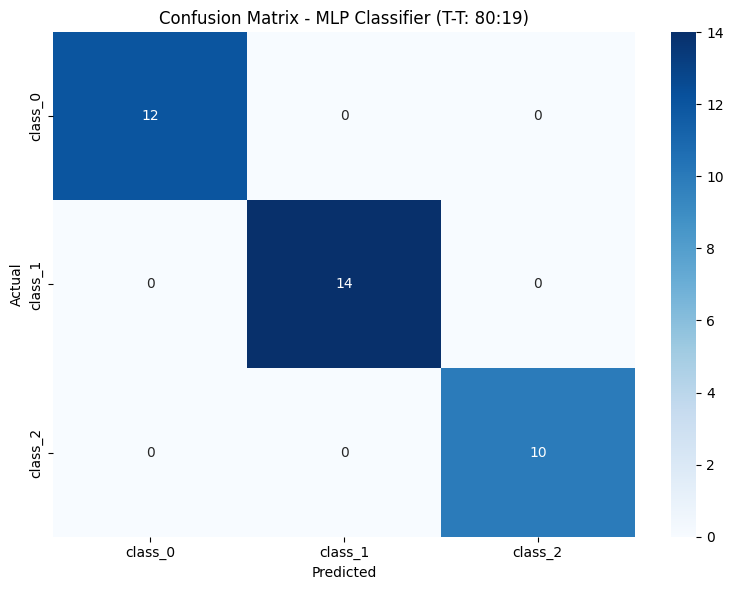

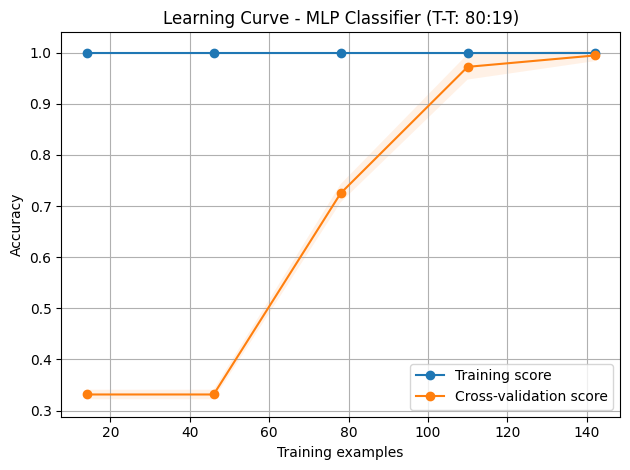

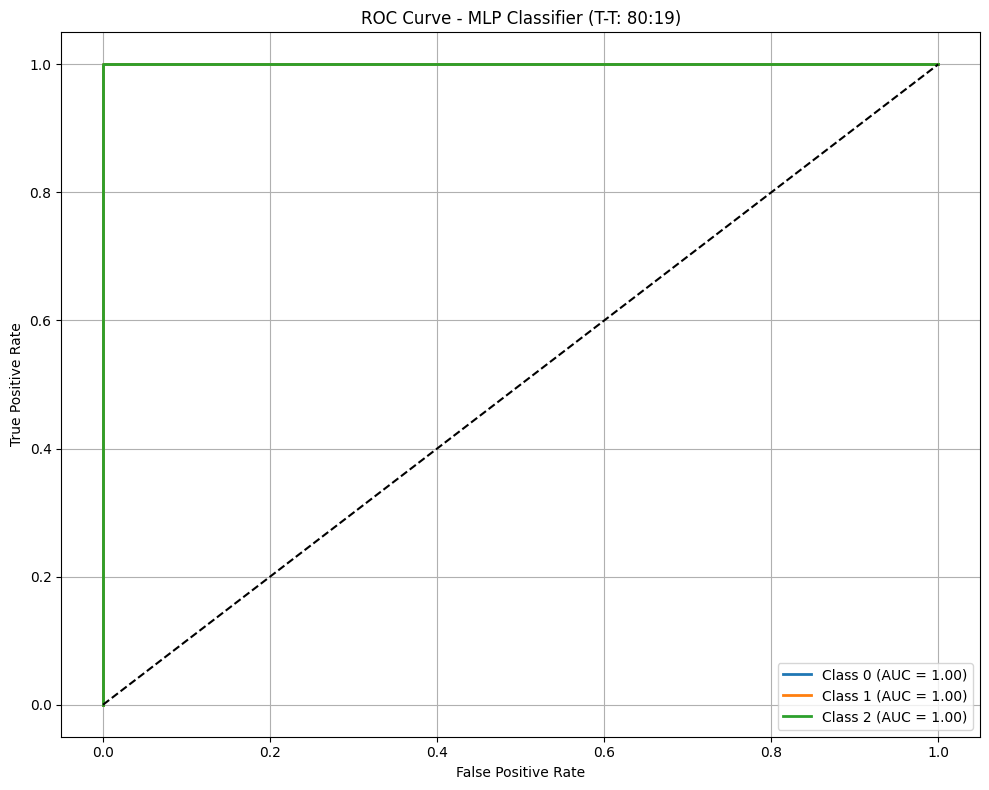

In [ ]:
# Best hyperparameters
momentum = 0.9
learning_rate = 0.01
epochs = 200

# Train-test split ratios to experiment with
splits = [0.5, 0.6, 0.7, 0.8]

# Store all results for summary table
results = []

# --- Helper functions for plotting ---

def plot_confusion_matrix(y_true, y_pred, title):
    """
    Generates a heatmap of the confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

def plot_learning_curve(estimator, X, y, title):
    """
    Generates a learning curve plot.
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
    )
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.title(f"Learning Curve - {title}")
    plt.xlabel("Training examples")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.tight_layout()
    plt.show()

def plot_roc_curve_multiclass(estimator, X_test, y_test, title):
    """
    Generates multiclass ROC curve and AUC.
    """
    n_classes = len(np.unique(y_test))
    y_score = estimator.predict_proba(X_test)
    y_bin = label_binarize(y_test, classes=np.unique(y))

    fpr, tpr, roc_auc = {}, {}, {}
    plt.figure(figsize=(10, 8))
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"ROC Curve - {title}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.tight_layout()
    plt.show()

# --- MLP Classifier Experimentation on Original Feature Set ---
print("MLP Classifier Experimentation on Original Feature Set\n")

for train_size in splits:
    test_size = 1 - train_size
    name = f"MLP Classifier (T-T: {int(train_size*100)}:{int(test_size*100)})"
    print(f"\n===== {name} =====")

    # Split using SCALED features
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, train_size=train_size, test_size=test_size,
        random_state=42, stratify=y
    )

    model = MLPClassifier(
        momentum=momentum,
        learning_rate_init=learning_rate,
        max_iter=epochs,
        random_state=42,
        activation='relu', # Using default activation
        solver='sgd',      # Using stochastic gradient descent for momentum
        verbose=False      # Set to True for detailed training output
    )

    # Train the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Generate and print classification report
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F-score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Save results
    results.append({
        "Classifier": "MLP",
        "Split": f"{int(train_size*100)}:{int(test_size*100)}",
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "PCA": "No"
    })

    # Plots
    plot_confusion_matrix(y_test, y_pred, name)
    plot_learning_curve(model, X_scaled, y, name)
    plot_roc_curve_multiclass(model, X_test, y_test, name)

##Plooting the graphs after applying PCA


MLP Classifier Experimentation with PCA

Number of PCA components: 10

===== MLP Classifier (PCA) (T-T: 50:50) =====
Accuracy: 0.9663
Precision: 0.9663
Recall: 0.9663
F-score: 0.9661
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       0.97      0.94      0.96        35
           2       0.96      0.96      0.96        24

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



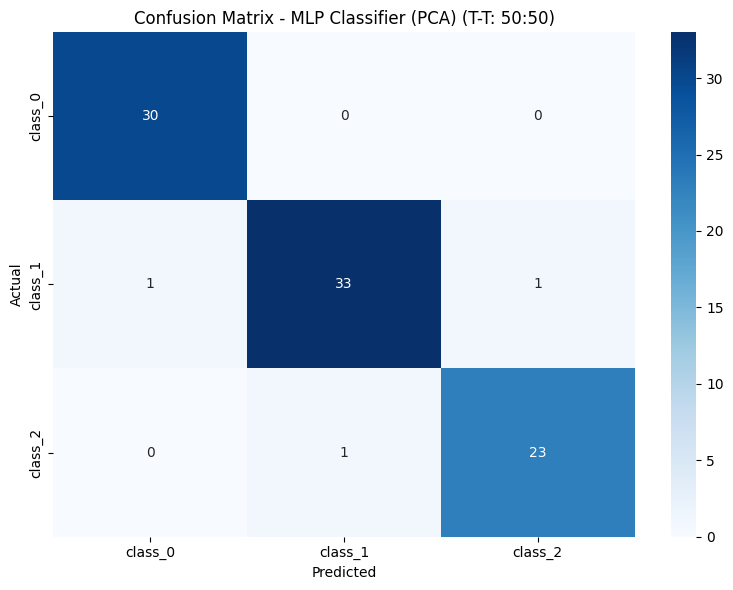

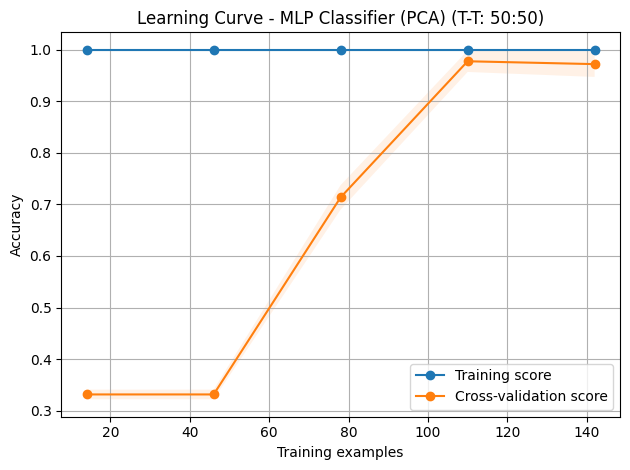

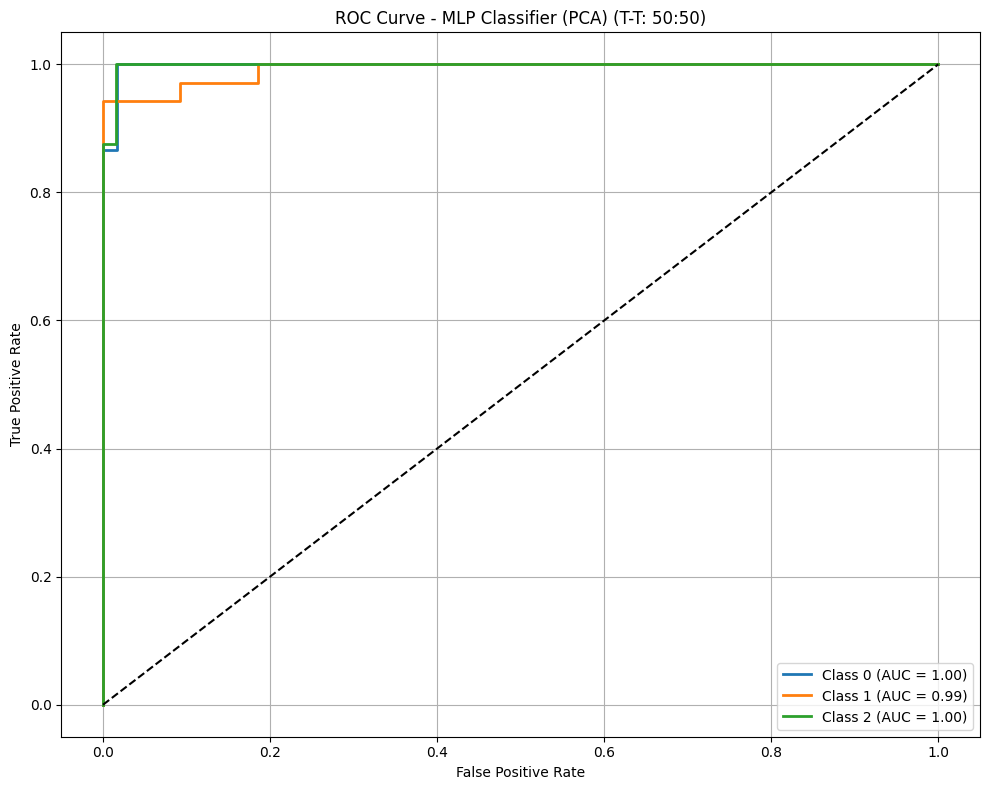


===== MLP Classifier (PCA) (T-T: 60:40) =====
Accuracy: 0.9722
Precision: 0.9728
Recall: 0.9722
F-score: 0.9722
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       0.97      0.97      0.97        29
           2       1.00      0.95      0.97        19

    accuracy                           0.97        72
   macro avg       0.98      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72



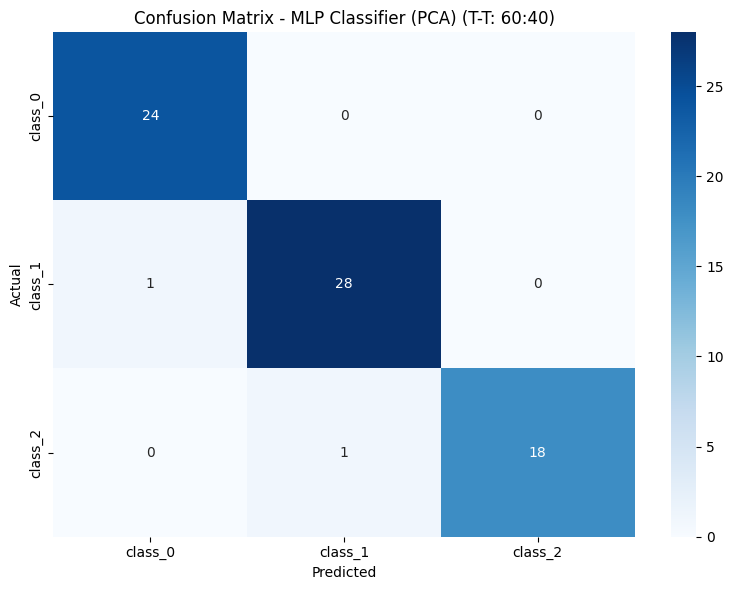

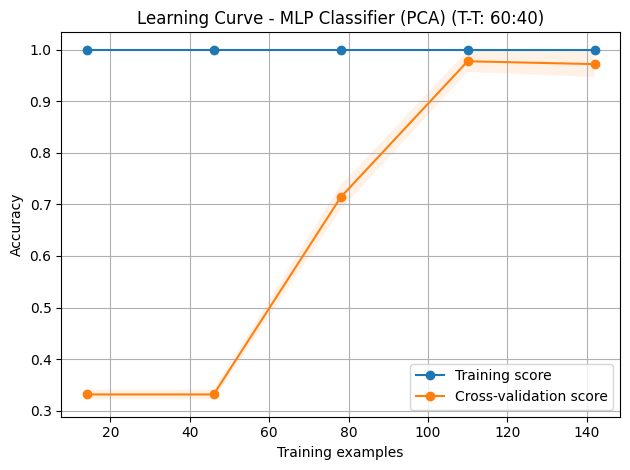

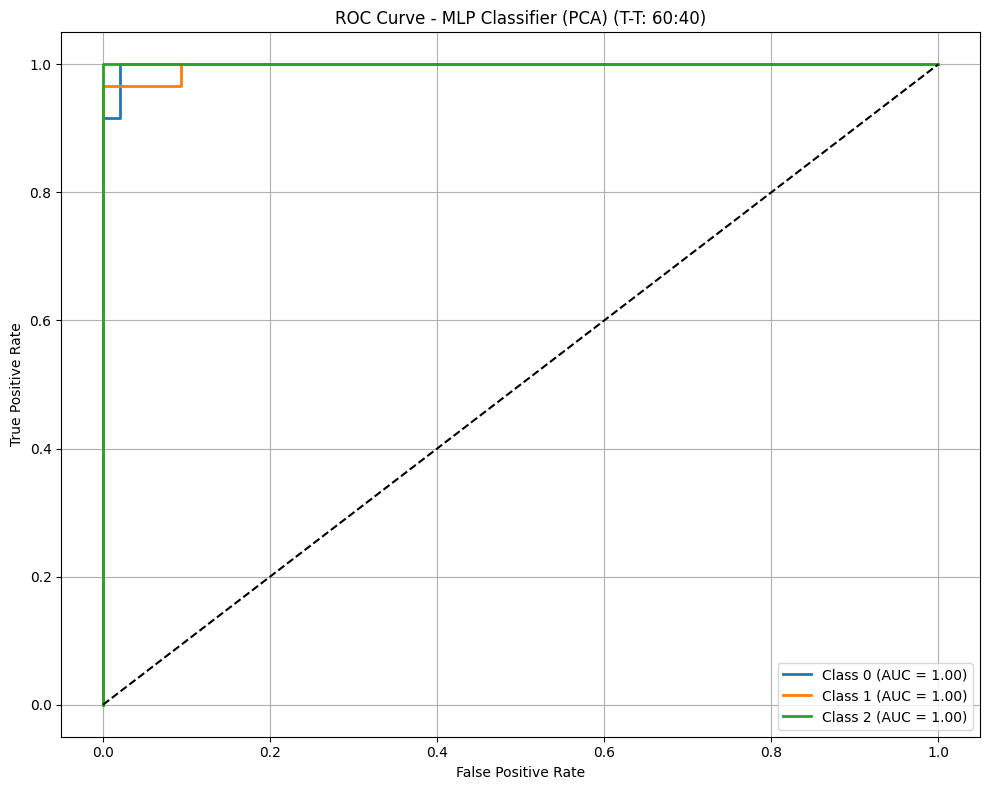


===== MLP Classifier (PCA) (T-T: 70:30) =====
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F-score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


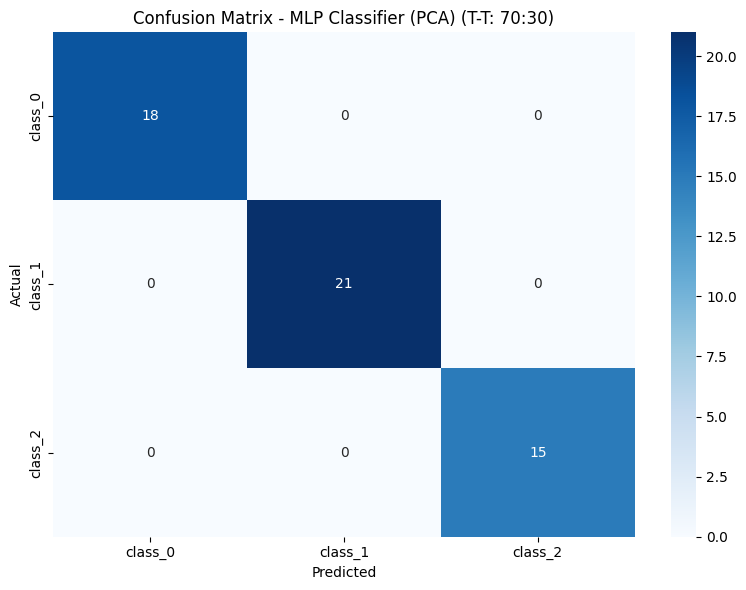

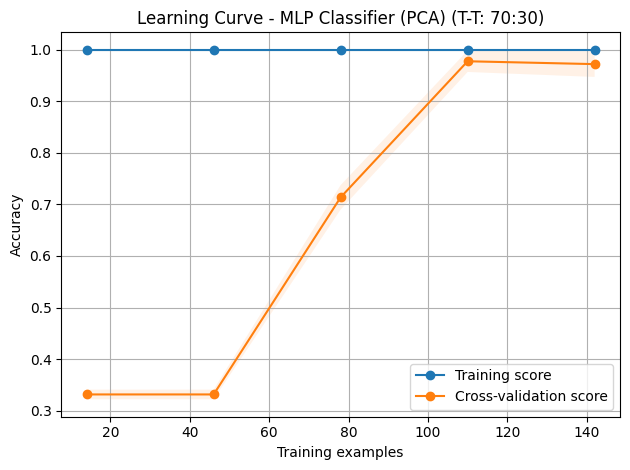

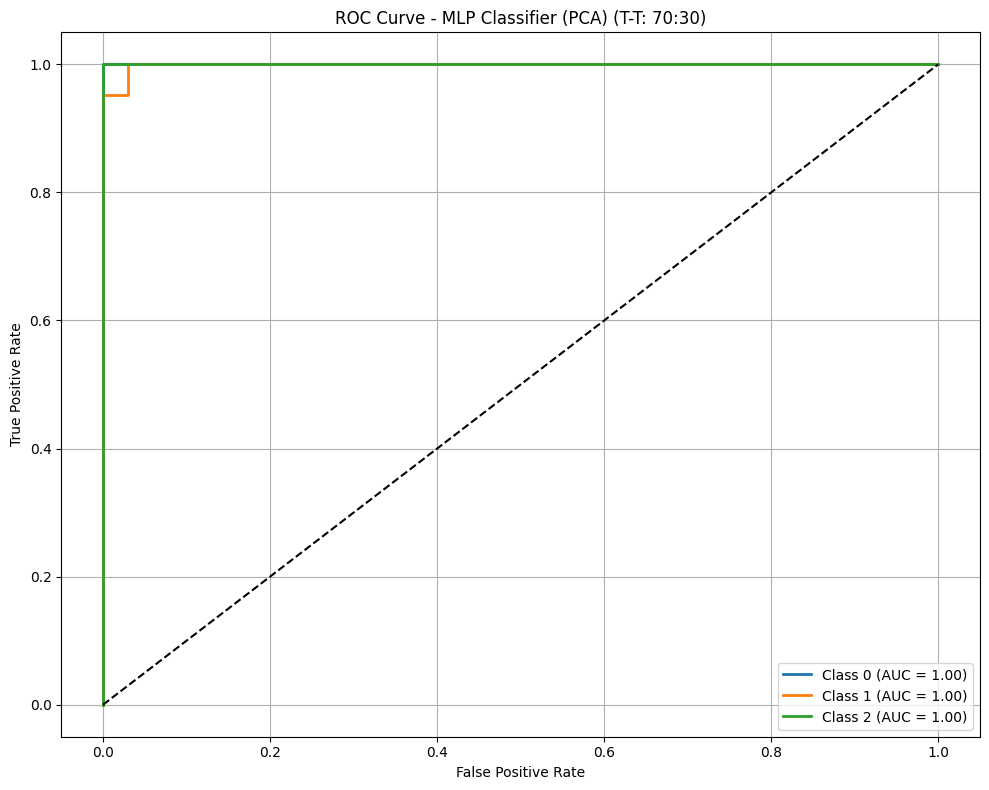


===== MLP Classifier (PCA) (T-T: 80:19) =====
Accuracy: 0.9722
Precision: 0.9741
Recall: 0.9722
F-score: 0.9720
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


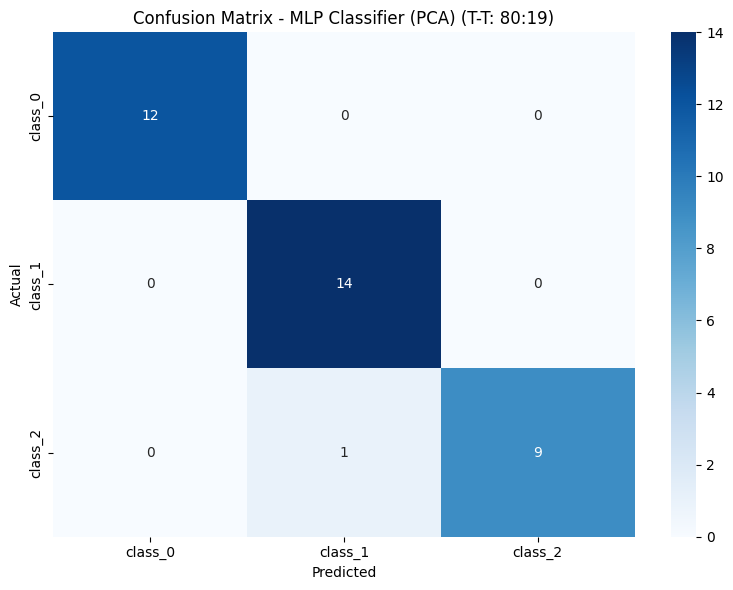

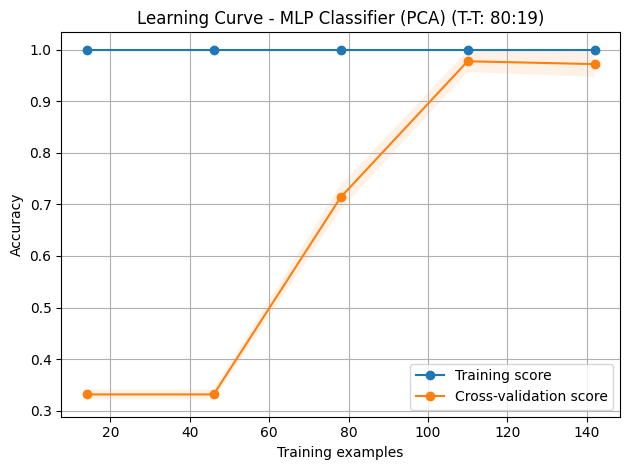

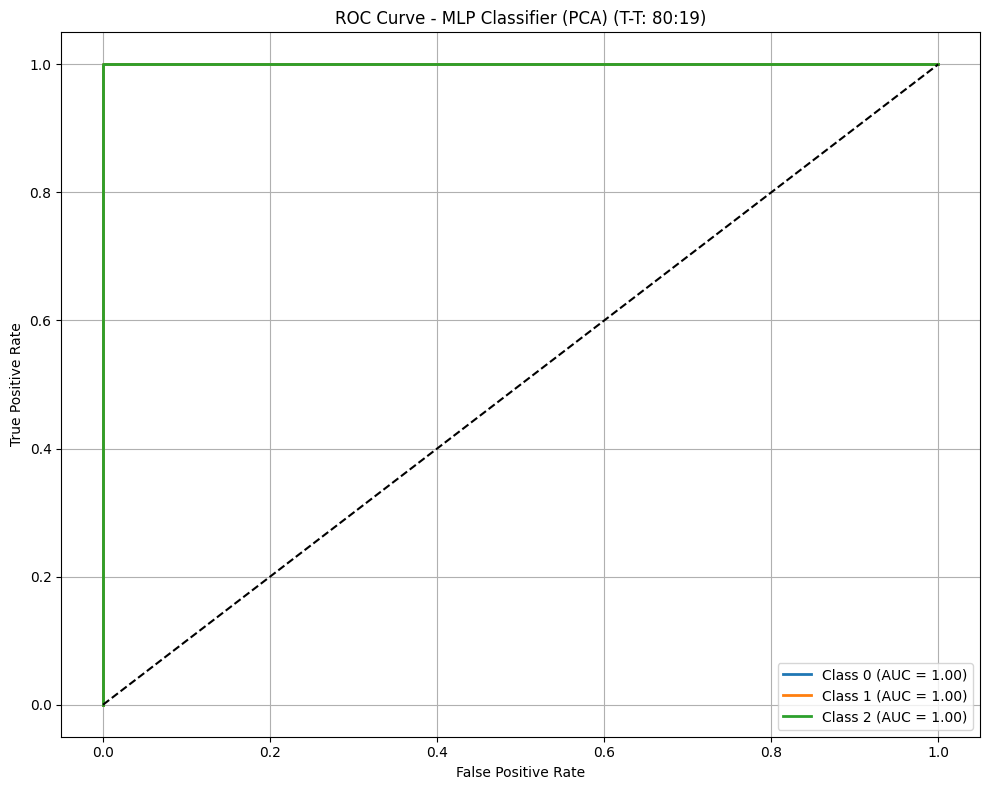

In [ ]:
# --- PCA for Feature Dimensionality Reduction ---
print("\nMLP Classifier Experimentation with PCA\n")

# Apply PCA with 95% variance explained
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print(f"Number of PCA components: {pca.n_components_}")

# Re-run MLP classifier on PCA-transformed data
for train_size in splits:
    test_size = 1 - train_size
    name_pca = f"MLP Classifier (PCA) (T-T: {int(train_size*100)}:{int(test_size*100)})"
    print(f"\n===== {name_pca} =====")

    # Split PCA-transformed features
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(
        X_pca, y, train_size=train_size, test_size=test_size,
        random_state=42, stratify=y
    )

    model = MLPClassifier(
        momentum=momentum,
        learning_rate_init=learning_rate,
        max_iter=epochs,
        random_state=42,
        activation='relu',
        solver='sgd',
        verbose=False
    )

    # Train the model
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Generate and print classification report
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F-score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Save results
    results.append({
        "Classifier": "MLP",
        "Split": f"{int(train_size*100)}:{int(test_size*100)}",
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "PCA": "Yes"
    })

    # Plots
    plot_confusion_matrix(y_test, y_pred, name_pca)
    plot_learning_curve(model, X_pca, y, name_pca)
    plot_roc_curve_multiclass(model, X_test_pca, y_test, name_pca)

In [ ]:
# --- Summary table ---
results_df = pd.DataFrame(results)
print("\n=== Performance Summary ===")
print(results_df)


=== Performance Summary ===
  Classifier  Split  Accuracy  Precision    Recall  F1-score  PCA
0        MLP  50:50  0.977528   0.977528  0.977528  0.977528   No
1        MLP  60:40  1.000000   1.000000  1.000000  1.000000   No
2        MLP  70:30  1.000000   1.000000  1.000000  1.000000   No
3        MLP  80:19  1.000000   1.000000  1.000000  1.000000   No
4        MLP  50:50  0.966292   0.966324  0.966292  0.966140  Yes
5        MLP  60:40  0.972222   0.972778  0.972222  0.972176  Yes
6        MLP  70:30  1.000000   1.000000  1.000000  1.000000  Yes
7        MLP  80:19  0.972222   0.974074  0.972222  0.971970  Yes
